In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os

import math

import librosa
import librosa.display

import IPython

from IPython.display import Audio

from sklearn.model_selection import train_test_split

In [2]:
plt.ioff();

In [3]:
meta_data = pd.read_csv('Source/UrbanSound8K/metadata/UrbanSound8K.csv')

In [5]:
meta_data
y, sr = librosa.load('Source/UrbanSound8K/audio/fold5/100263-2-0-117.wav')

In [ ]:
y, sr = librosa.load('Source/UrbanSound8K/audio/fold5/100263-2-0-117.wav')

In [ ]:
Audio(y, rate=sr)

In [ ]:
y

In [ ]:
RMS=math.sqrt(np.mean(y**2))


In [ ]:
RMS*.1

In [ ]:
noise= (np.random.normal(0, RMS*.1, y.shape[0]))

In [ ]:
noise

In [ ]:
plt.plot(y)
plt.show()

In [ ]:
plt.plot(noise)
plt.show()

In [ ]:
signal_with_noise = y+noise
plt.plot(signal_with_noise)
plt.show()

In [ ]:
Audio(signal_with_noise, rate=sr)

In [ ]:
sparse_noise = np.linspace(0,0, 88200)

In [ ]:
for x  in np.arange(0,88200, 50):
    sparse_noise[x] = noise[x]

In [ ]:
sparse_noise

In [ ]:
plt.plot(list_noise)
plt.show()

In [ ]:
import cmath

In [ ]:
signal_noise = y+list_noise


In [ ]:
y.mean()

In [ ]:
y.std()

In [ ]:
sparse_signal_noise = y + sparse_noise

In [ ]:
plt.plot(y[0:500])
plt.show();

In [ ]:
plt.plot(sparse_signal_noise[0:500])
plt.show()

In [ ]:
Audio(sparse_signal_noise, rate=sr)

In [ ]:
fig, ax = plt.subplots()
x_stft = librosa.stft(y)
ampl = librosa.amplitude_to_db(abs(x_stft))
librosa.display.specshow(ampl, ax=ax,)

ax.set_title('Librosa generated spectrogram:')
fig.tight_layout()
plt.show()

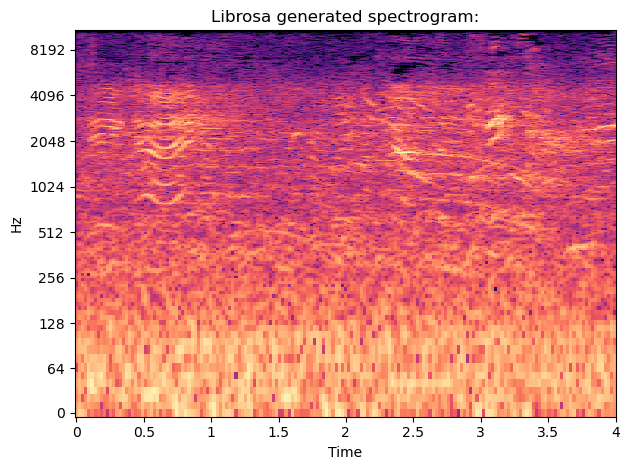

In [7]:
fig, ax = plt.subplots()
x_stft = librosa.stft(y)
ampl = librosa.amplitude_to_db(abs(x_stft))
librosa.display.specshow(ampl, ax=ax,x_axis='time' , y_axis='log')

ax.set_title('Librosa generated spectrogram:')
fig.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots()
x_stft = librosa.stft(signal_with_noise)
ampl = librosa.amplitude_to_db(abs(x_stft))
librosa.display.specshow(ampl, ax=ax,x_axis='time' , y_axis='log')

ax.set_title('Librosa generated spectrogram:')
fig.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots()
x_stft = librosa.stft(y)
ampl = librosa.amplitude_to_db(abs(x_stft))
librosa.display.specshow(ampl, ax=ax,)

ax.set_title('Librosa generated spectrogram:')
fig.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots()
x_stft = librosa.stft(sparse_signal_noise)
ampl = librosa.amplitude_to_db(abs(x_stft))
librosa.display.specshow(ampl, ax=ax,)

ax.set_title('Librosa generated spectrogram:')
fig.tight_layout()
plt.show()

In [ ]:
    fig, ax = plt.subplots()
    S = librosa.feature.melspectrogram(y=y, sr=sr,)
    S_db_mel = librosa.amplitude_to_db(S, ref=np.max)
    
    img = librosa.display.specshow(S_db_mel, x_axis='time' , y_axis='log', ax = ax)
    plt.show()

In [ ]:
    fig, ax = plt.subplots()
    S = librosa.feature.melspectrogram(y=sparse_signal_noise, sr=sr,)
    S_db_mel = librosa.amplitude_to_db(S, ref=np.max)
    
    img = librosa.display.specshow(S_db_mel, x_axis='time' , y_axis='log', ax = ax)
    plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
librosa.display.waveshow(y, sr=sr, ax=ax)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax.set_title('Matplotlib generated spectrogram:')
ax.specgram(y, cmap='gist_gray');
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(6,6), nrows=2)

ax[0].set_title('Matplotlib generated spectrogram:')
ax[0].specgram(y, cmap='Pastel1');
ax[0].axis('off');

x_stft = librosa.stft(y)
ampl = librosa.amplitude_to_db(abs(x_stft))
librosa.display.specshow(ampl, ax=ax[1],)

ax[1].set_title('Librosa generated spectrogram:')
fig.tight_layout()
plt.show()

In [ ]:
8732*.75

In [ ]:
8732*.85

In [ ]:
8732*.15

In [ ]:
meta_data['class'].value_counts()

In [ ]:
# Save training data spectograms

for idx, row in train_meta_data.iterrows():
    
    path = 'Source/UrbanSound8K/audio/fold{}/{}'.format(row['fold'], row['slice_file_name'])
    
    y, sr = librosa.load(path)
    
    # Standardize the length to 88,200 samples, or 4 seconds
    if y.shape != (88200,):
        y = np.resize(y, 88200)
    
    
    # Create Matplotlib Image
    fig, ax = plt.subplots()
    
    S = librosa.feature.melspectrogram(y=y, sr=sr,)
    S_db_mel = librosa.amplitude_to_db(S, ref=np.max)
    
    img = librosa.display.specshow(S_db_mel, x_axis='time' , y_axis='log', ax = ax)
    plt.axis('off')    
    
    
    # Save the Spectogram Image
    my_path = 'Data/'
    file_name = row['slice_file_name'][:-4]

    training_path = 'mel_train/{}/'.format(row['classID'])
        
    if not os.path.isdir(my_path + training_path):
        os.makedirs(my_path + training_path)
        
    plt.savefig(my_path + training_path + file_name)
    
    plt.close()

In [ ]:
# Save training data spectograms

for idx, row in test_meta_data.iterrows():
    
    path = 'Source/UrbanSound8K/audio/fold{}/{}'.format(row['fold'], row['slice_file_name'])
    
    y, sr = librosa.load(path)
    
    # Standardize the length to 88,200 samples, or 4 seconds
    if y.shape != (88200,):
        y = np.resize(y, 88200)
    
    
    # Create Matplotlib Image
    fig, ax = plt.subplots()
    
    S = librosa.feature.melspectrogram(y=y, sr=sr,)
    S_db_mel = librosa.amplitude_to_db(S, ref=np.max)
    
    img = librosa.display.specshow(S_db_mel, x_axis='time' , y_axis='log', ax = ax)
    plt.axis('off')    
    
    
    # Save the Spectogram Image
    my_path = 'Data/'
    file_name = row['slice_file_name'][:-4]

    testing_path = 'mel_test/{}/'.format(row['classID'])
        
    if not os.path.isdir(my_path + testing_path):
        os.makedirs(my_path + testing_path)
        
    plt.savefig(my_path + testing_path + file_name)
    
    plt.close()

In [ ]:
train_meta_data.head(40)

In [ ]:
meta_data[meta_data['slice_file_name'] == '77751-4-1-0.wav']

In [ ]:
    path = 'Source/UrbanSound8K/audio/fold{}/{}'.format(2,'77751-4-1-0.wav')
    
    y, sr = librosa.load(path)
    
    # Standardize the length to 88,200 samples, or 4 seconds
    if y.shape != (88200,):
        y = np.resize(y, 88200)
    
    fig, ax = plt.subplots()
    
    D = librosa.stft(y)  # Short Time Fourier Transform (STFT) of y
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    
    img = librosa.display.specshow(S_db, x_axis='time' , y_axis='linear', ax = ax)
    plt.axis('off')
    plt.show()

### Plotting Spectogram as Logged Y-Axis

In [ ]:
    path = 'Source/UrbanSound8K/audio/fold{}/{}'.format(2,'77751-4-1-0.wav')
    
    y, sr = librosa.load(path)
    
    # Standardize the length to 88,200 samples, or 4 seconds
    if y.shape != (88200,):
        y = np.resize(y, 88200)
    
    fig, ax = plt.subplots()
    
    D = librosa.stft(y)  # Short Time Fourier Transform (STFT) of y
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    
    img = librosa.display.specshow(S_db, x_axis='time' , y_axis='linear', ax = ax)
    plt.axis('off')
    plt.show()

### Plotting Mel-Spectogram Logged Y-Axis

In [ ]:
    path = 'Source/UrbanSound8K/audio/fold{}/{}'.format(2,'77751-4-1-0.wav')
    
    y, sr = librosa.load(path)
    
    # Standardize the length to 88,200 samples, or 4 seconds
    if y.shape != (88200,):
        y = np.resize(y, 88200)
    
    fig, ax = plt.subplots()
    
    S = librosa.feature.melspectrogram(y=y, sr=sr,)
    S_db_mel = librosa.amplitude_to_db(S, ref=np.max)


    img = librosa.display.specshow(S_db_mel, x_axis='time' , y_axis='log', ax = ax)
    plt.axis('off')
    plt.show()

In [ ]:
    path = 'Source/UrbanSound8K/audio/fold{}/{}'.format(1,'180937-7-3-0.wav')
    
    y, sr = librosa.load(path)
    
    # Standardize the length to 88,200 samples, or 4 seconds
    if y.shape != (88200,):
        y = np.resize(y, 88200)
    
    fig, ax = plt.subplots()
    
    S = librosa.feature.melspectrogram(y=y, sr=sr,)
    S_db_mel = librosa.amplitude_to_db(S, ref=np.max)


    img = librosa.display.specshow(S_db_mel, x_axis='time' , y_axis='log', ax = ax)
    plt.axis('off')
    plt.show()

In [ ]:
meta_data[meta_data['slice_file_name'] == '98223-7-0-0.wav']

In [ ]:
    path = 'Source/UrbanSound8K/audio/fold{}/{}'.format(1,'98223-7-0-0.wav')
    
    y, sr = librosa.load(path)
    
    # Standardize the length to 88,200 samples, or 4 seconds
    if y.shape != (88200,):
        y = np.resize(y, 88200)
    
    fig, ax = plt.subplots()
    
    S = librosa.feature.melspectrogram(y=y, sr=sr,)
    S_db_mel = librosa.amplitude_to_db(S, ref=np.max)


    img = librosa.display.specshow(S_db_mel, x_axis='time' , y_axis='log', ax = ax)#, cmap_div='coolwarm')
    #librosa.display.cmap(S_db_mel)
    plt.show()

In [ ]:
    path = 'Source/UrbanSound8K/audio/fold{}/{}'.format(1,'98223-7-0-0.wav')
    
    y, sr = librosa.load(path)
    
    # Standardize the length to 88,200 samples, or 4 seconds
    if y.shape != (88200,):
        y = np.resize(y, 88200)
    
    fig, ax = plt.subplots()

    sgram_mag, _ = librosa.magphase(S)

    mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sr)
#librosa.display.specshow(mel_scale_sgram)


# use the decibel scale to get the final Mel Spectrogram

    mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
    librosa.display.specshow(mel_sgram, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.show()


### Previous Spectogram Function (Linear Spectograms)

In [ ]:
# Save train spectograms

for idx, row in train_meta_data.iterrows():
    path = 'Source/UrbanSound8K/audio/fold{}/{}'.format(row['fold'],
                                                                                         row['slice_file_name'])
    y, sr = librosa.load(path)
    
    # Standardize the length to 88,200 samples, or 4 seconds
    if y.shape != (88200,):
        y = np.resize(y, 88200)
    
    fig, ax = plt.subplots()
    
    D = librosa.stft(y)  # Short Time Fourier Transform (STFT) of y
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    
    img = librosa.display.specshow(S_db, ax = ax)
    
    my_path = 'Source/'
    file_name = row['slice_file_name'][:-4]

    training_path = 'mel_train/{}/'.format(row['classID'])
        
    if not os.path.isdir(my_path + training_path):
        os.makedirs(my_path + training_path)
        
    plt.savefig(my_path + training_path + file_name)
    
    plt.close()

In [ ]:
# Save test spectograms

for idx, row in test_meta_data.iterrows():
    path = 'Source/UrbanSound8K/audio/fold{}/{}'.format(row['fold'],
                                                                                         row['slice_file_name'])
    y, sr = librosa.load(path)
    
    # Standardize the length to 88,200 samples, or 4 seconds
    if y.shape != (88200,):
        y = np.resize(y, 88200)

    
    fig, ax = plt.subplots()
    
    D = librosa.stft(y)  # Short Time Fourier Transform (STFT) of y
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    
    img = librosa.display.specshow(S_db, ax = ax)
    
    my_path = 'Source/'
    file_name = row['slice_file_name'][:-4]
    
    testing_path = 'mel_test/{}/'.format(row['classID'])
        
    if not os.path.isdir(my_path + testing_path):
        os.makedirs(my_path + testing_path)
        
    plt.savefig(my_path + testing_path + file_name)

    plt.close()

In [ ]:
street_music_children = ['street_music', 'children_playing']

In [ ]:
meta_data['class'].value_counts()

In [ ]:
meta_data

In [ ]:
street_music = meta_data[meta_data['class'] == 'street_music']
children = meta_data[meta_data['class'] == 'children_playing']

Children Playing vs Street Music

Children_Playing Spectograms

In [ ]:
children.head(10)

In [ ]:
children_background = children[children['salience'] == 2]

In [ ]:
def linear_spects(df, samples):
    
    for idx, row in df[:samples].iterrows():
        path = 'Source/UrbanSound8K/audio/fold{}/{}'.format(row['fold'], row['slice_file_name'])
    
        y, sr = librosa.load(path)
    
    # Standardize the length to 88,200 samples, or 4 seconds
        if y.shape != (88200,):
            y = np.resize(y, 88200)
    
        fig, ax = plt.subplots()
    
        D = librosa.stft(y)  # Short Time Fourier Transform (STFT) of y
        S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    
        img = librosa.display.specshow(S_db, x_axis='time' , y_axis='linear', ax = ax)
    
        ax.set(title = 'Y Linear- Class: {} Salience: {} \n Fold #: {} Audio File: {}'
           .format(row['class'], row['salience'], row['fold'], row['slice_file_name']))

    return plt.show()

In [ ]:
def log_spects(df,samples):
    
    for idx, row in df[:samples].iterrows():
        path = 'Source/UrbanSound8K/audio/fold{}/{}'.format(row['fold'], row['slice_file_name'])
    
        y, sr = librosa.load(path)
    
    # Standardize the length to 88,200 samples, or 4 seconds
        if y.shape != (88200,):
            y = np.resize(y, 88200)
    
        fig, ax = plt.subplots()
    
        D = librosa.stft(y)  # Short Time Fourier Transform (STFT) of y
        S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    
        img = librosa.display.specshow(S_db, x_axis='time' , y_axis='log', ax = ax)
    
        ax.set(title = 'Y Log- Class: {} Salience: {} \n Fold #: {} Audio File: {}'
           .format(row['class'], row['salience'], row['fold'], row['slice_file_name']))

    return plt.show()

In [ ]:
def mel_spects(df,samples):
    
    for idx, row in df[:samples].iterrows():
        path = 'Source/UrbanSound8K/audio/fold{}/{}'.format(row['fold'], row['slice_file_name'])
    
        y, sr = librosa.load(path)
    
    # Standardize the length to 88,200 samples, or 4 seconds
        if y.shape != (88200,):
            y = np.resize(y, 88200)
            
        S = librosa.feature.melspectrogram(y=y, sr=sr)
        S_db_mel = librosa.amplitude_to_db(S, ref=np.max)
        
        fig, ax = plt.subplots()   
        
        img = librosa.display.specshow(S_db_mel, x_axis='time' , y_axis='log', ax = ax)
    
        ax.set(title = 'Mel Spectogram- Class: {} Salience: {} \n Fold #: {} Audio File: {}'
           .format(row['class'], row['salience'], row['fold'], row['slice_file_name']))

    return plt.show()

In [ ]:
def mel_spects_magphase(df, samples):
    
    for idx, row in df[:samples].iterrows():
        path = 'Source/UrbanSound8K/audio/fold{}/{}'.format(row['fold'], row['slice_file_name'])
    
        y, sr = librosa.load(path)
    
    # Standardize the length to 88,200 samples, or 4 seconds
        if y.shape != (88200,):
            y = np.resize(y, 88200)
            
        S = librosa.feature.melspectrogram(y=y, sr=sr)
        
        sgram_mag, _ = librosa.magphase(S)
        
        mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sr)

        
        
        fig, ax = plt.subplots()  
        
        mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
        img = librosa.display.specshow(mel_sgram, sr=sr, x_axis='time', y_axis='mel', ax = ax)
    
        ax.set(title = 'Mel Spectogram- Class: {} Salience: {} \n Fold #: {} Audio File: {}'
           .format(row['class'], row['salience'], row['fold'], row['slice_file_name']))

    return plt.show()

In [ ]:
mel_spects(children, 5)

In [ ]:
mel_spects(street_music, 5)

In [ ]:
mel_spects_magphase(children, 5)

In [ ]:
mel_spects(street_music_background, 5)

In [ ]:
mel_spects_magphase(street_music_background, 5)

In [ ]:
    y, sr = librosa.load(path)
    
    # Standardize the length to 88,200 samples, or 4 seconds
    if y.shape != (88200,):
        y = np.resize(y, 88200)
    
    fig, ax = plt.subplots()

    sgram_mag, _ = librosa.magphase(S)

    mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sr)
#librosa.display.specshow(mel_scale_sgram)


# use the decibel scale to get the final Mel Spectrogram

    mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
    librosa.display.specshow(mel_sgram, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.show()


In [ ]:
mel_spects(children, 5)

In [ ]:
mel_spects(children_background, 5)

In [ ]:
mel_spects(street_music_background, 5)

In [ ]:
Audio('Source/UrbanSound8K/audio/fold4/107653-9-0-18.wav')

In [ ]:
Audio('Source/UrbanSound8K/audio/fold4/107653-9-0-3.wav')

In [ ]:
street_music.head(10)

In [ ]:
street_music_background = street_music[street_music['salience'] == 2]

In [ ]:
street_music_background

Drilling vs Jackhammer

Street Music

Air Conditioner

Air Conditioner vs Engine Idling

In [ ]:
Train 85
Validation 65
Test 75 or 80

In [ ]:
y, sr = librosa.load('Source/UrbanSound8K/audio/fold5/100263-2-0-117.wav')

Audio(y, rate=sr)

RMS=math.sqrt(np.mean(y**2))
noise= (np.random.normal(0, y.std(), y.shape[0]))/2
sparse_noise = np.linspace(0,0, 88200)
for x  in np.arange(0,88200, 50):
    sparse_noise[x] = noise[x]
sparse_noise

In [8]:
train_meta_data, test_meta_data = train_test_split(meta_data, test_size=0.15\
                                                   ,random_state=42, stratify=meta_data['classID'])

In [ ]:
# Save train spectograms

for idx, row in train_meta_data.iterrows():
    path = 'Source/UrbanSound8K/audio/fold{}/{}'.format(row['fold'], row['slice_file_name'])
    y, sr = librosa.load(path)
    
    # Standardize the length to 88,200 samples, or 4 seconds
    if y.shape != (88200,):
        y = np.resize(y, 88200)
    
    RMS=math.sqrt(np.mean(y**2))
    noise= (np.random.normal(0, RMS*.05, y.shape[0]))
    signal_with_noise = y + noise
    
    fig, ax = plt.subplots()
    
    S = librosa.feature.melspectrogram(y=signal_with_noise, sr=sr,)
    S_db_mel = librosa.amplitude_to_db(S, ref=np.max)
    
    img = librosa.display.specshow(S_db_mel, x_axis='time' , y_axis='log', ax = ax)
    plt.axis('off')    
    
    my_path = 'Data/'
    file_name = row['slice_file_name'][:-4]

    training_path = 'mel_train_and_some_noise/{}/'.format(row['classID'])
    
    if not os.path.isdir(my_path + training_path):
        os.makedirs(my_path + training_path)
        
    plt.savefig(my_path + training_path + file_name + '_2')
    
    plt.close()

In [ ]:
# Save test spectograms

for idx, row in test_meta_data.iterrows():
    path = 'Source/UrbanSound8K/audio/fold{}/{}'.format(row['fold'],
                                                                                         row['slice_file_name'])
    y, sr = librosa.load(path)
    
    # Standardize the length to 88,200 samples, or 4 seconds
    if y.shape != (88200,):
        y = np.resize(y, 88200)

    RMS=math.sqrt(np.mean(y**2))
    noise= (np.random.normal(0, y.std(), y.shape[0]))/2
    sparse_noise = np.linspace(0,0, 88200)
    for x in np.arange(0,88200, 50):
        sparse_noise[x] = noise[x]
    sparse_noise
    sparse_signal_noise = y + sparse_noise
    
    fig, ax = plt.subplots()
    
    S = librosa.feature.melspectrogram(y=sparse_signal_noise, sr=sr,)
    S_db_mel = librosa.amplitude_to_db(S, ref=np.max)
    
    img = librosa.display.specshow(S_db_mel, x_axis='time' , y_axis='log', ax = ax)
    plt.axis('off')    
    
    my_path = 'Source/'
    file_name = row['slice_file_name'][:-4]
    
    testing_path = 'mel_test/{}/'.format(row['classID'])
        
    if not os.path.isdir(my_path + testing_path):
        os.makedirs(my_path + testing_path)
        
    plt.savefig(my_path + testing_path + file_name)

    plt.close()

In [ ]:

    fig, ax = plt.subplots()
    
    S = librosa.feature.melspectrogram(y=sparse_signal_noise, sr=sr,)
    S_db_mel = librosa.amplitude_to_db(S, ref=np.max)
    
    img = librosa.display.specshow(S_db_mel, x_axis='time' , y_axis='log', ax = ax)
    plt.axis('off')    
    plt.show()

Create Log STFT Spectograms and add noise to train data


In [ ]:
fig, ax = plt.subplots()
x_stft = librosa.stft(y)
ampl = librosa.amplitude_to_db(abs(x_stft))
librosa.display.specshow(ampl, ax=ax,x_axis='time' , y_axis='log')

fig.tight_layout()
plt.axis('off')    

plt.show()

In [ ]:
meta_data.sample(15)

In [ ]:
y, sr = librosa.load('Source/UrbanSound8K/audio/fold3/195451-5-0-12.wav')
fig, ax = plt.subplots()
x_stft = librosa.stft(y)

    
RMS=math.sqrt(np.mean(y**2))
noise= (np.random.normal(0, RMS*.2, y.shape[0]))
signal_with_noise = y + noise

ampl = librosa.amplitude_to_db(abs(x_stft))
librosa.display.specshow(ampl, ax=ax,x_axis='time' , y_axis='log')

fig.tight_layout()
plt.axis('off')    

plt.show()

In [ ]:
# Save train spectograms

for idx, row in train_meta_data.iterrows():
    path = 'Source/UrbanSound8K/audio/fold{}/{}'.format(row['fold'], row['slice_file_name'])
    y, sr = librosa.load(path)
    
    # Standardize the length to 88,200 samples, or 4 seconds
    if y.shape != (88200,):
        y = np.resize(y, 88200)
    
    RMS=math.sqrt(np.mean(y**2))
    noise= (np.random.normal(0, RMS*.2, y.shape[0]))
    signal_with_noise = y + noise
    
    fig, ax = plt.subplots()
    
    S = librosa.feature.melspectrogram(y=signal_with_noise, sr=sr,)
    S_db_mel = librosa.amplitude_to_db(S, ref=np.max)
    
    img = librosa.display.specshow(S_db_mel, x_axis='time' , y_axis='log', ax = ax)
    plt.axis('off')    
    
    my_path = 'Data/'
    file_name = row['slice_file_name'][:-4]

    training_path = 'mel_train_and_some_noise/{}/'.format(row['classID'])
    
    if not os.path.isdir(my_path + training_path):
        os.makedirs(my_path + training_path)
        
    plt.savefig(my_path + training_path + file_name + '_2')
    
    plt.close()

In [ ]:
def new_mel_spects(fold_num, file_name, class_type, salience):
    fig, ax = plt.subplots()
    y, sr = librosa.load('Source/UrbanSound8K/audio/fold{}/{}'.format(fold_num, file_name))
    if y.shape != (88200,):
        y = np.resize(y, 88200)
        
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
    S_dB = librosa.power_to_db(S, ref=np.max)
    img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr,fmax=8000, ax=ax)

    ax.set(title = 'Mel Spectogram- Class: {} Salience: {}'
           .format(class_type, salience))

    plt.show()

In [ ]:
meta_data.sample(40)

In [ ]:
    y, sr = librosa.load('Source/UrbanSound8K/audio/fold10/39847-5-0-8.wav')
    fig, ax = plt.subplots()
    
    S = librosa.feature.melspectrogram(y=y, sr=sr,n_mels=128, fmax=8000)
    S_db_mel = librosa.amplitude_to_db(S, ref=np.max)
    
    img = librosa.display.specshow(S_db_mel, x_axis='time' , y_axis='log', ax = ax)
    plt.axis('off')    
    plt.show()

In [ ]:
y, sr = librosa.load('Source/UrbanSound8K/audio/fold5/178260-7-1-4.wav')
    
fig, ax = plt.subplots()
x_stft = librosa.stft(y)
ampl = librosa.amplitude_to_db(abs(x_stft))
librosa.display.specshow(ampl, ax=ax,x_axis='time' , y_axis='log')

ax.set_title('Librosa generated spectrogram:')
fig.tight_layout()
plt.show()

In [ ]:
y, sr = librosa.load('Source/UrbanSound8K/audio/fold5/178260-7-1-4.wav')
fig, ax = plt.subplots()
    
S = librosa.feature.melspectrogram(y=y, sr=sr,n_mels=128, fmax=8000)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)
    
img = librosa.display.specshow(S_db_mel, x_axis='time' , y_axis='log', ax = ax)
plt.axis('off')    
plt.show()

In [ ]:
new_mel_spects(5, '100263-2-0-117.wav', 'dog_bark', 1)

In [ ]:
new_mel_spects(7, '99812-1-2-0.wav', 'car_horn',2)

In [ ]:
13230-0-0-5.wav	,

In [ ]:
train_meta_data, test_meta_data = train_test_split(meta_data, test_size=0.15\
                                                   ,random_state=42, stratify=meta_data['classID'])

In [ ]:
# Save train spectograms

for idx, row in train_meta_data.iterrows():
    path = 'Source/UrbanSound8K/audio/fold{}/{}'.format(row['fold'], row['slice_file_name'])
    y, sr = librosa.load(path)
    
    # Standardize the length to 88,200 samples, or 4 seconds
    if y.shape != (88200,):
        y = np.resize(y, 88200)
    fig, ax = plt.subplots()
    
    S = librosa.feature.melspectrogram(y= y , sr= sr,)
    S_db_mel = librosa.amplitude_to_db(S, ref=np.max)
    
    img = librosa.display.specshow(S_db_mel, x_axis='time' , y_axis='log', ax = ax)
    plt.axis('off')    
    
    my_path = 'Data/'
    file_name = row['slice_file_name'][:-4]

    training_path = 'train_mel_spect_and_noise/{}/'.format(row['classID'])
    
    if not os.path.isdir(my_path + training_path):
        os.makedirs(my_path + training_path)
        
    plt.savefig(my_path + training_path + file_name + '_2')
    
    plt.close()

In [ ]:
# Save train spectograms

for idx, row in train_meta_data.iterrows():
    path = 'Source/UrbanSound8K/audio/fold{}/{}'.format(row['fold'], row['slice_file_name'])
    y, sr = librosa.load(path)
    
    # Standardize the length to 88,200 samples, or 4 seconds
    if y.shape != (88200,):
        y = np.resize(y, 88200)
    
    RMS=math.sqrt(np.mean(y**2))
    noise= (np.random.normal(0, RMS*.1, y.shape[0]))
    signal_with_noise = y + noise
    
    fig, ax = plt.subplots()
    
    S = librosa.feature.melspectrogram(y=signal_with_noise, sr=sr,)
    S_db_mel = librosa.amplitude_to_db(S, ref=np.max)
    
    img = librosa.display.specshow(S_db_mel, x_axis='time' , y_axis='log', ax = ax)
    plt.axis('off')    
    
    my_path = 'Data/'
    file_name = row['slice_file_name'][:-4]

    training_path = 'train_mel_spect_and_noise/{}/'.format(row['classID'])
    
    if not os.path.isdir(my_path + training_path):
        os.makedirs(my_path + training_path)
        
    plt.savefig(my_path + training_path + file_name + '_2')
    
    plt.close()

Regular Log Spectograms

In [ ]:
fig, ax = plt.subplots()
x_stft = librosa.stft(y)
ampl = librosa.amplitude_to_db(abs(x_stft))
librosa.display.specshow(ampl, ax=ax,x_axis='time' , y_axis='log')

ax.set_title('Librosa generated spectrogram:')
fig.tight_layout()
plt.show()

In [9]:
# Save train spectograms

for idx, row in train_meta_data.iterrows():
    
    path = 'Source/UrbanSound8K/audio/fold{}/{}'.format(row['fold'], row['slice_file_name'])
    y, sr = librosa.load(path)
    
    # Standardize the length to 88,200 samples, or 4 seconds
    if y.shape != (88200,):
        y = np.resize(y, 88200)
        
    fig, ax = plt.subplots()
    
    RMS = math.sqrt(np.mean(y**2))
    noise = (np.random.normal(0, RMS*.1, y.shape[0]))
    signal_with_noise = y + noise

    x_stft = librosa.stft(signal_with_noise)
    ampl = librosa.amplitude_to_db(abs(x_stft))
    librosa.display.specshow(ampl, ax=ax, x_axis='time' , y_axis='log')
    plt.axis('off')    
    
    my_path = 'Data/'
    file_name = row['slice_file_name'][:-4]

    training_path = 'train_log_spectograms/{}/'.format(row['classID'])
    
    if not os.path.isdir(my_path + training_path):
        os.makedirs(my_path + training_path)
        
    plt.savefig(my_path + training_path + file_name + '_2')
    
    plt.close()

In [ ]:
# Save train spectograms

for idx, row in train_meta_data.iterrows():
    
    path = 'Source/UrbanSound8K/audio/fold{}/{}'.format(row['fold'], row['slice_file_name'])
    y, sr = librosa.load(path)
    
    # Standardize the length to 88,200 samples, or 4 seconds
    if y.shape != (88200,):
        y = np.resize(y, 88200)
    fig, ax = plt.subplots()
    
    x_stft = librosa.stft(y)
    ampl = librosa.amplitude_to_db(abs(x_stft))
    librosa.display.specshow(ampl, ax=ax, x_axis='time' , y_axis='log')
    plt.axis('off')    
    
    my_path = 'Data/'
    file_name = row['slice_file_name'][:-4]
    training_path = 'train_log_spectograms/{}/'.format(row['classID'])
    
    if not os.path.isdir(my_path + training_path):
        os.makedirs(my_path + training_path)
        
    plt.savefig(my_path + training_path + file_name + '_noise')
    
    plt.close()

In [11]:
# Save train spectograms

for idx, row in train_meta_data.iterrows():
    path = 'Source/UrbanSound8K/audio/fold{}/{}'.format(row['fold'], row['slice_file_name'])
    y, sr = librosa.load(path)
    
    # Standardize the length to 88,200 samples, or 4 seconds
    if y.shape != (88200,):
        y = np.resize(y, 88200)
        
    fig, ax = plt.subplots()
    
    S = librosa.feature.melspectrogram(y=y, sr=sr,)
    S_db_mel = librosa.amplitude_to_db(S, ref=np.max)
    
    img = librosa.display.specshow(S_db_mel, x_axis='time' , y_axis='log', ax = ax)
    plt.axis('off')    
    
    my_path = 'Data/'
    file_name = row['slice_file_name'][:-4]

    training_path = 'train_mel_spect_and_noise/{}/'.format(row['classID'])
    
    if not os.path.isdir(my_path + training_path):
        os.makedirs(my_path + training_path)
        
    plt.savefig(my_path + training_path + file_name)
    
    plt.close()

In [12]:
# Save train spectograms

for idx, row in train_meta_data.iterrows():
    path = 'Source/UrbanSound8K/audio/fold{}/{}'.format(row['fold'], row['slice_file_name'])
    y, sr = librosa.load(path)
    
    # Standardize the length to 88,200 samples, or 4 seconds
    if y.shape != (88200,):
        y = np.resize(y, 88200)
    
    RMS=math.sqrt(np.mean(y**2))
    noise= (np.random.normal(0, RMS*.1, y.shape[0]))
    signal_with_noise = y + noise
    
    fig, ax = plt.subplots()
    
    S = librosa.feature.melspectrogram(y=signal_with_noise, sr=sr,)
    S_db_mel = librosa.amplitude_to_db(S, ref=np.max)
    
    img = librosa.display.specshow(S_db_mel, x_axis='time' , y_axis='log', ax = ax)
    plt.axis('off')    
    
    my_path = 'Data/'
    file_name = row['slice_file_name'][:-4]

    training_path = 'train_mel_spect_and_noise/{}/'.format(row['classID'])
    
    if not os.path.isdir(my_path + training_path):
        os.makedirs(my_path + training_path)
        
    plt.savefig(my_path + training_path + file_name + '_2')
    
    plt.close()

In [14]:
test_meta_data

,slice_file_name,fsID,start,end,salience,fold,classID,class
1583,138473-9-0-12.wav,138473,7.523034,11.523034,2,3,9,street_music
4924,194458-9-1-122.wav,194458,163.261507,167.261507,2,4,9,street_music
49,100852-0-0-6.wav,100852,3.000000,7.000000,1,5,0,air_conditioner
5441,204773-3-9-0.wav,204773,42.184968,46.184968,1,2,3,dog_bark
6753,54545-3-0-0.wav,54545,0.826371,4.826371,1,2,3,dog_bark
...,...,...,...,...,...,...,...,...
3421,170022-0-0-0.wav,170022,9.042850,13.042850,1,8,0,air_conditioner
6638,50661-5-0-3.wav,50661,1.500000,5.500000,1,4,5,engine_idling
6747,54383-0-0-4.wav,54383,2.000000,6.000000,1,8,0,air_conditioner
2883,162103-0-0-1.wav,162103,0.500000,4.500000,1,8,0,air_conditioner


In [13]:
# Save training data spectograms

for idx, row in test_meta_data.iterrows():
    
    path = 'Source/UrbanSound8K/audio/fold{}/{}'.format(row['fold'], row['slice_file_name'])
    
    y, sr = librosa.load(path)
    
    # Standardize the length to 88,200 samples, or 4 seconds
    if y.shape != (88200,):
        y = np.resize(y, 88200)
    
    
    # Create Matplotlib Image
    fig, ax = plt.subplots()
    
    S = librosa.feature.melspectrogram(y=y, sr=sr,)
    S_db_mel = librosa.amplitude_to_db(S, ref=np.max)
    
    img = librosa.display.specshow(S_db_mel, x_axis='time' , y_axis='log', ax = ax)
    plt.axis('off')    
    
    # Save the Spectogram Image
    my_path = 'Data/'
    file_name = row['slice_file_name'][:-4]

    testing_path = 'test_mel_spect/{}/'.format(row['classID'])
        
    if not os.path.isdir(my_path + testing_path):
        os.makedirs(my_path + testing_path)
        
    plt.savefig(my_path + testing_path + file_name)
    
    plt.close()